In [1]:
!pip install translate

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from translate import Translator


In [3]:
def replace_outliers_with_nan(series, margin=1.5):
    median = series.median()
    iqr = series.quantile(0.75) - series.quantile(0.25)
    lower_bound = median - margin * iqr
    upper_bound = median + margin * iqr
    series[(series < lower_bound) | (series > upper_bound)] = np.nan
    return series

In [4]:
df1 = pd.read_csv('data\plant1.csv', error_bad_lines=False, sep=";")
df1.rename(columns = {'Unnamed: 15':'LTS temperature 2'}, inplace = True)

plant_name = ['Plant 1']*len(df1)
df1.insert(0, 'Plant Name', plant_name)

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

i= 2
while i<21:
    df1.iloc[:,i] = pd.to_numeric(df1.iloc[:, i].str.replace(',', '.'), errors='coerce')
    i = i+1

C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\3989312414.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('data\plant1.csv', error_bad_lines=False, sep=";")
C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\3989312414.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.iloc[:,i] = pd.to_numeric(df1.iloc[:, i].str.replace(',', '.'), errors='coerce')


In [5]:
df2 = pd.read_csv('data\plant2.csv', error_bad_lines=False)

no_data_list = [np.nan]*(df1.shape[1]-df2.shape[1]-1)
nd_columns_df = pd.DataFrame([no_data_list])
df2 = pd.concat([df2, nd_columns_df], axis=1)

plant_name = ['Plant 2']*len(df2)
df2.insert(0, 'Plant Name', plant_name)
df2.columns = df1.columns

df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])


C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\1929312452.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2 = pd.read_csv('data\plant2.csv', error_bad_lines=False)


In [6]:
df3 = pd.read_excel('data\plant3.xlsx')

translator = Translator(to_lang="en", from_lang="zh")
translated_column_names = [translator.translate(column) for column in df3.columns]
df3.columns = translated_column_names

no_data_list = [np.nan]*(df1.shape[1]-df3.shape[1])
nd_columns_df = pd.DataFrame([no_data_list])
df3 = pd.concat([df3, nd_columns_df], axis=1)

# Reorder columns
new_column_order = [0,1,2,3,19,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
df3 = df3.iloc[:, new_column_order]

plant_name = ['Plant 3']*len(df3)
df3.insert(0, 'Plant Name', plant_name)

df3.columns = df1.columns

df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])

In [7]:
df4 = pd.read_excel('data\plant4.xlsx', skiprows=3)
df4 = df4.drop(df4.iloc[:, 0:5], axis=1)

translator = Translator(to_lang="en", from_lang="de")
translated_column_names = [translator.translate(column) for column in df4.columns]
df4.columns = translated_column_names

no_data_list = [np.nan]*(df1.shape[1]-df4.shape[1])
nd_columns_df = pd.DataFrame([no_data_list])
df4 = pd.concat([df4, nd_columns_df], axis=1)

# Reorder columns
new_column_order = [0,1,4,2,5,7,6,14,15,16,17,3,8,18,9,10,11,12,13,19]
df4 = df4.iloc[:, new_column_order]

plant_name = ['Plant 4']*len(df4)
df4.insert(0, 'Plant Name', plant_name)
df4.columns = df1.columns

df4['Timestamp'] = pd.to_datetime(df4['Timestamp'])

In [8]:
df5 = pd.read_json('data\plant5.json')

df5.reset_index(inplace=True)
df5.rename(columns={"index": "timestamp"}, inplace=True)

df_map = pd.read_excel('data\working_student_task_mapping_plant5.xlsx')
df_map = df_map.drop(['unit'], axis=1)

for column in df5.columns:
    if column in df_map['sensor_no'].values:
        measurement = df_map[df_map['sensor_no'] == column]['measurement'].iloc[0]     
        df5.rename(columns={column: measurement}, inplace=True)  

no_data_list = [np.nan]*(df1.shape[1]-df5.shape[1])
nd_columns_df = pd.DataFrame([no_data_list])
df5 = pd.concat([df5, nd_columns_df], axis=1)

# Reorder columns
new_column_order = [0,6,12,11,4,5,1,7,8,9,10,13,2,3,14,15,16,17,18,19]
df5 = df5.iloc[:, new_column_order]

plant_name = ['Plant 5']*len(df5)
df5.insert(0, 'Plant Name', plant_name)
df5.columns = df1.columns

df5['Timestamp'] = pd.to_datetime(df5['Timestamp'])

In [9]:
columns_to_process = list(range(2, 21))

for col in columns_to_process:
    df1.iloc[:, col] = replace_outliers_with_nan(df1.iloc[:, col])
for col in columns_to_process:
    df2.iloc[:, col] = replace_outliers_with_nan(df2.iloc[:, col])
for col in columns_to_process:
    df3.iloc[:, col] = replace_outliers_with_nan(df3.iloc[:, col])
for col in columns_to_process:
    df4.iloc[:, col] = replace_outliers_with_nan(df4.iloc[:, col])
for col in columns_to_process:
    df5.iloc[:, col] = replace_outliers_with_nan(df5.iloc[:, col])



C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\840458386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[(series < lower_bound) | (series > upper_bound)] = np.nan
C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\840458386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[(series < lower_bound) | (series > upper_bound)] = np.nan
C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\840458386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\840458386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[(series < lower_bound) | (series > upper_bound)] = np.nan
C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\840458386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[(series < lower_bound) | (series > upper_bound)] = np.nan
C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\840458386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [10]:
df_all = pd.concat([df1, df2, df3, df4,df5], ignore_index=True)

In [19]:
df_all

,Plant Name,Timestamp,Natural gas,Steam to carbon,Steam flow to primary reformer,Steam flow to secondary reformer,HTS inlet temperature,HTS outlet temperature,HTS temperature 1,HTS temperature 2,...,HTS temperature 4,CO concentration at HTS outlet,LTS inlet temperature,LTS outlet temperature,LTS temperature 1,LTS temperature 2,LTS temperature 3,LTS temperature 4,LTS temperature 5,CO concentration at LTS outlet
0,Plant 1,2022-09-23 01:00:00,60671.820000,2.884,154357.5,5543.384000,625.461000,685.244000,634.557000,652.20800,...,678.32700,NaN,483.333000,504.116000,483.407,493.326,500.751,502.787,503.435,NaN
1,Plant 1,2022-09-23 01:10:00,60248.100000,2.888,153477.5,5543.813000,625.428000,684.893000,635.166000,652.89800,...,679.11300,NaN,484.129000,504.519000,484.231,494.197,501.583,503.359,503.850,NaN
2,Plant 1,2022-09-23 01:20:00,60503.080000,2.877,153546.8,5522.341000,625.484000,685.064000,635.796000,653.55100,...,680.09800,NaN,483.016000,505.365000,483.883,494.340,502.080,504.063,504.639,NaN
3,Plant 1,2022-09-23 01:30:00,60424.980000,2.886,153839.4,5537.906000,625.463000,685.514000,636.162000,653.75800,...,680.67800,NaN,481.823000,505.250000,482.697,493.014,500.896,503.306,504.214,NaN
4,Plant 1,2022-09-23 01:40:00,60385.160000,2.884,153602.9,5537.202000,625.497000,685.364000,636.256000,653.63300,...,680.33100,NaN,483.318000,504.048000,483.217,492.820,500.250,502.269,503.037,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29682,Plant 5,2022-07-16 00:00:00,145852.535296,NaN,NaN,9701.286918,676.827575,801.839675,674.850650,706.28885,...,793.19165,NaN,404.166425,427.410200,NaN,NaN,NaN,NaN,NaN,NaN
29683,Plant 5,2022-07-17 00:00:00,145886.506653,NaN,NaN,9699.517618,677.066600,801.412850,675.112175,706.40810,...,792.75830,NaN,402.806075,426.246800,NaN,NaN,NaN,NaN,NaN,NaN
29684,Plant 5,2022-07-18 00:00:00,145731.836944,NaN,NaN,9699.744970,677.326625,801.887000,675.289550,706.91060,...,793.36310,NaN,402.855575,426.368075,NaN,NaN,NaN,NaN,NaN,NaN
29685,Plant 5,2022-07-19 00:00:00,139220.218952,NaN,NaN,9700.747337,678.825500,804.153650,676.877525,711.08600,...,796.92890,NaN,402.680900,426.202850,NaN,NaN,NaN,NaN,NaN,NaN


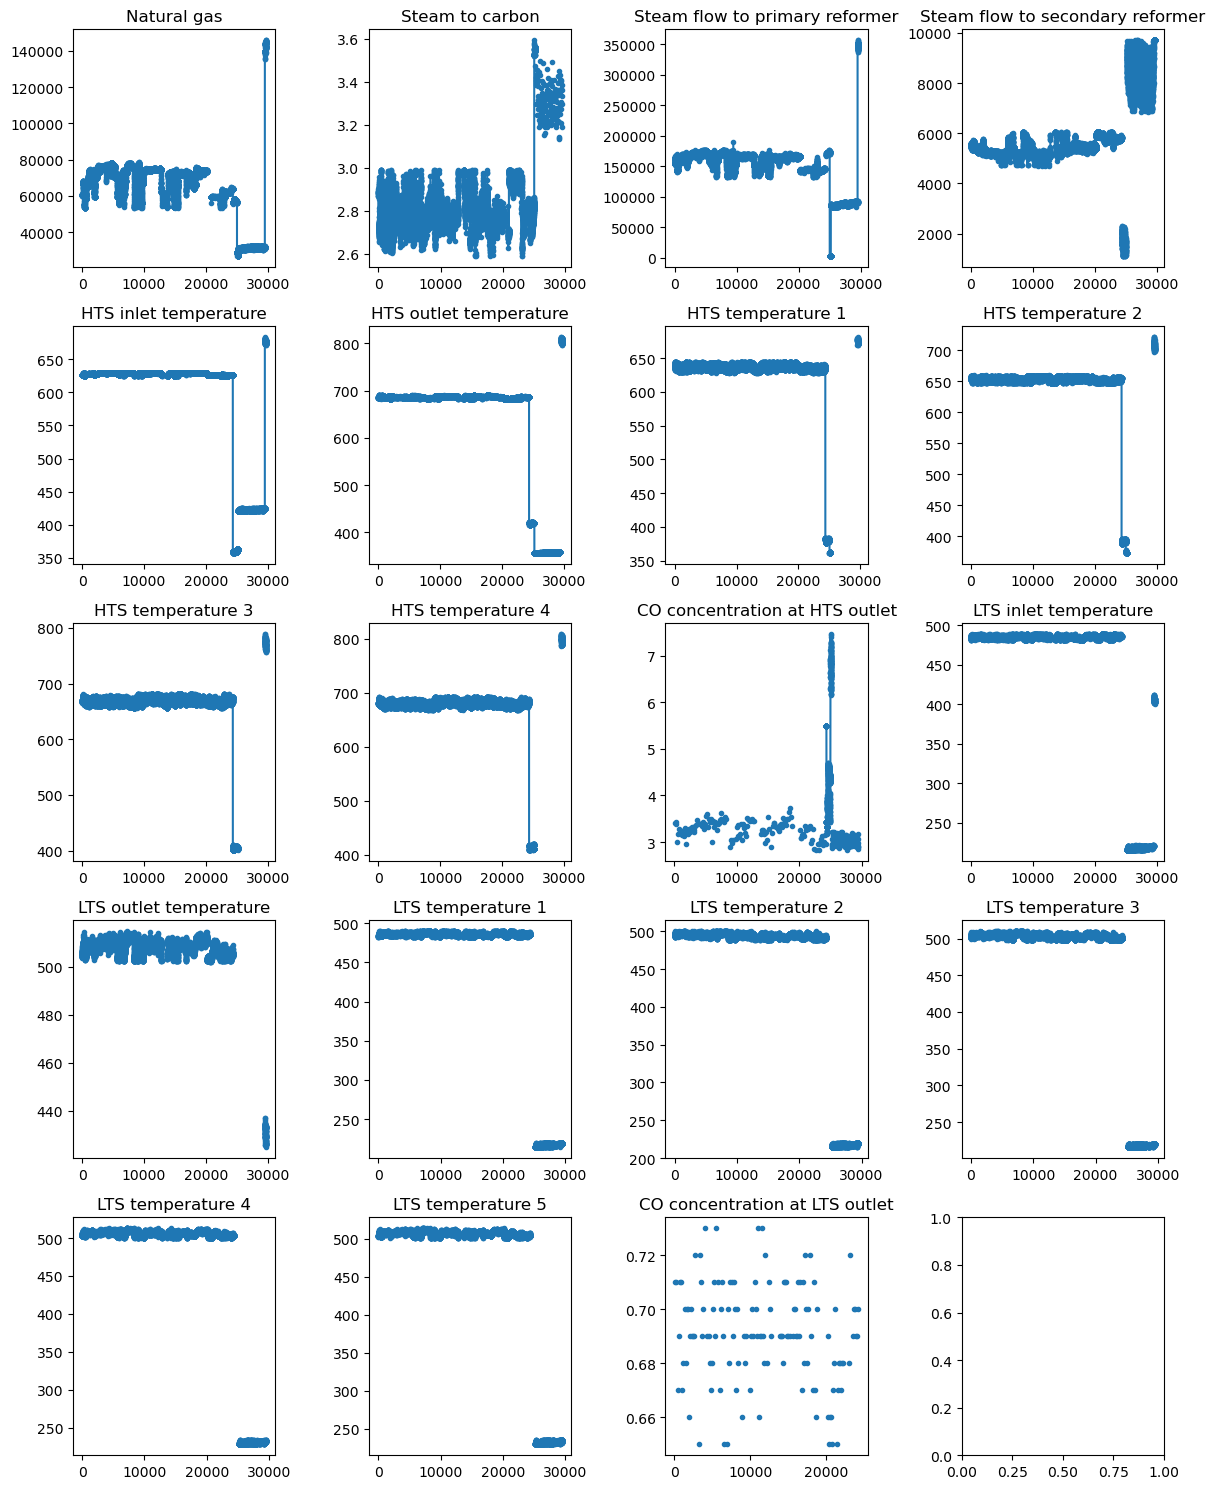

In [30]:
columns_to_plot = df_all.columns[2:]

fig, axes = plt.subplots(5, 4, figsize=(12, 15))

# Flatten the axes array to iterate through subplots
axes = axes.flatten()

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot):    
    df_all[column].plot(ax=axes[i], marker=".")
    axes[i].set_title(column)  

plt.tight_layout()
plt.show()

C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\1525577432.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df_all.groupby('Plant Name').mean()


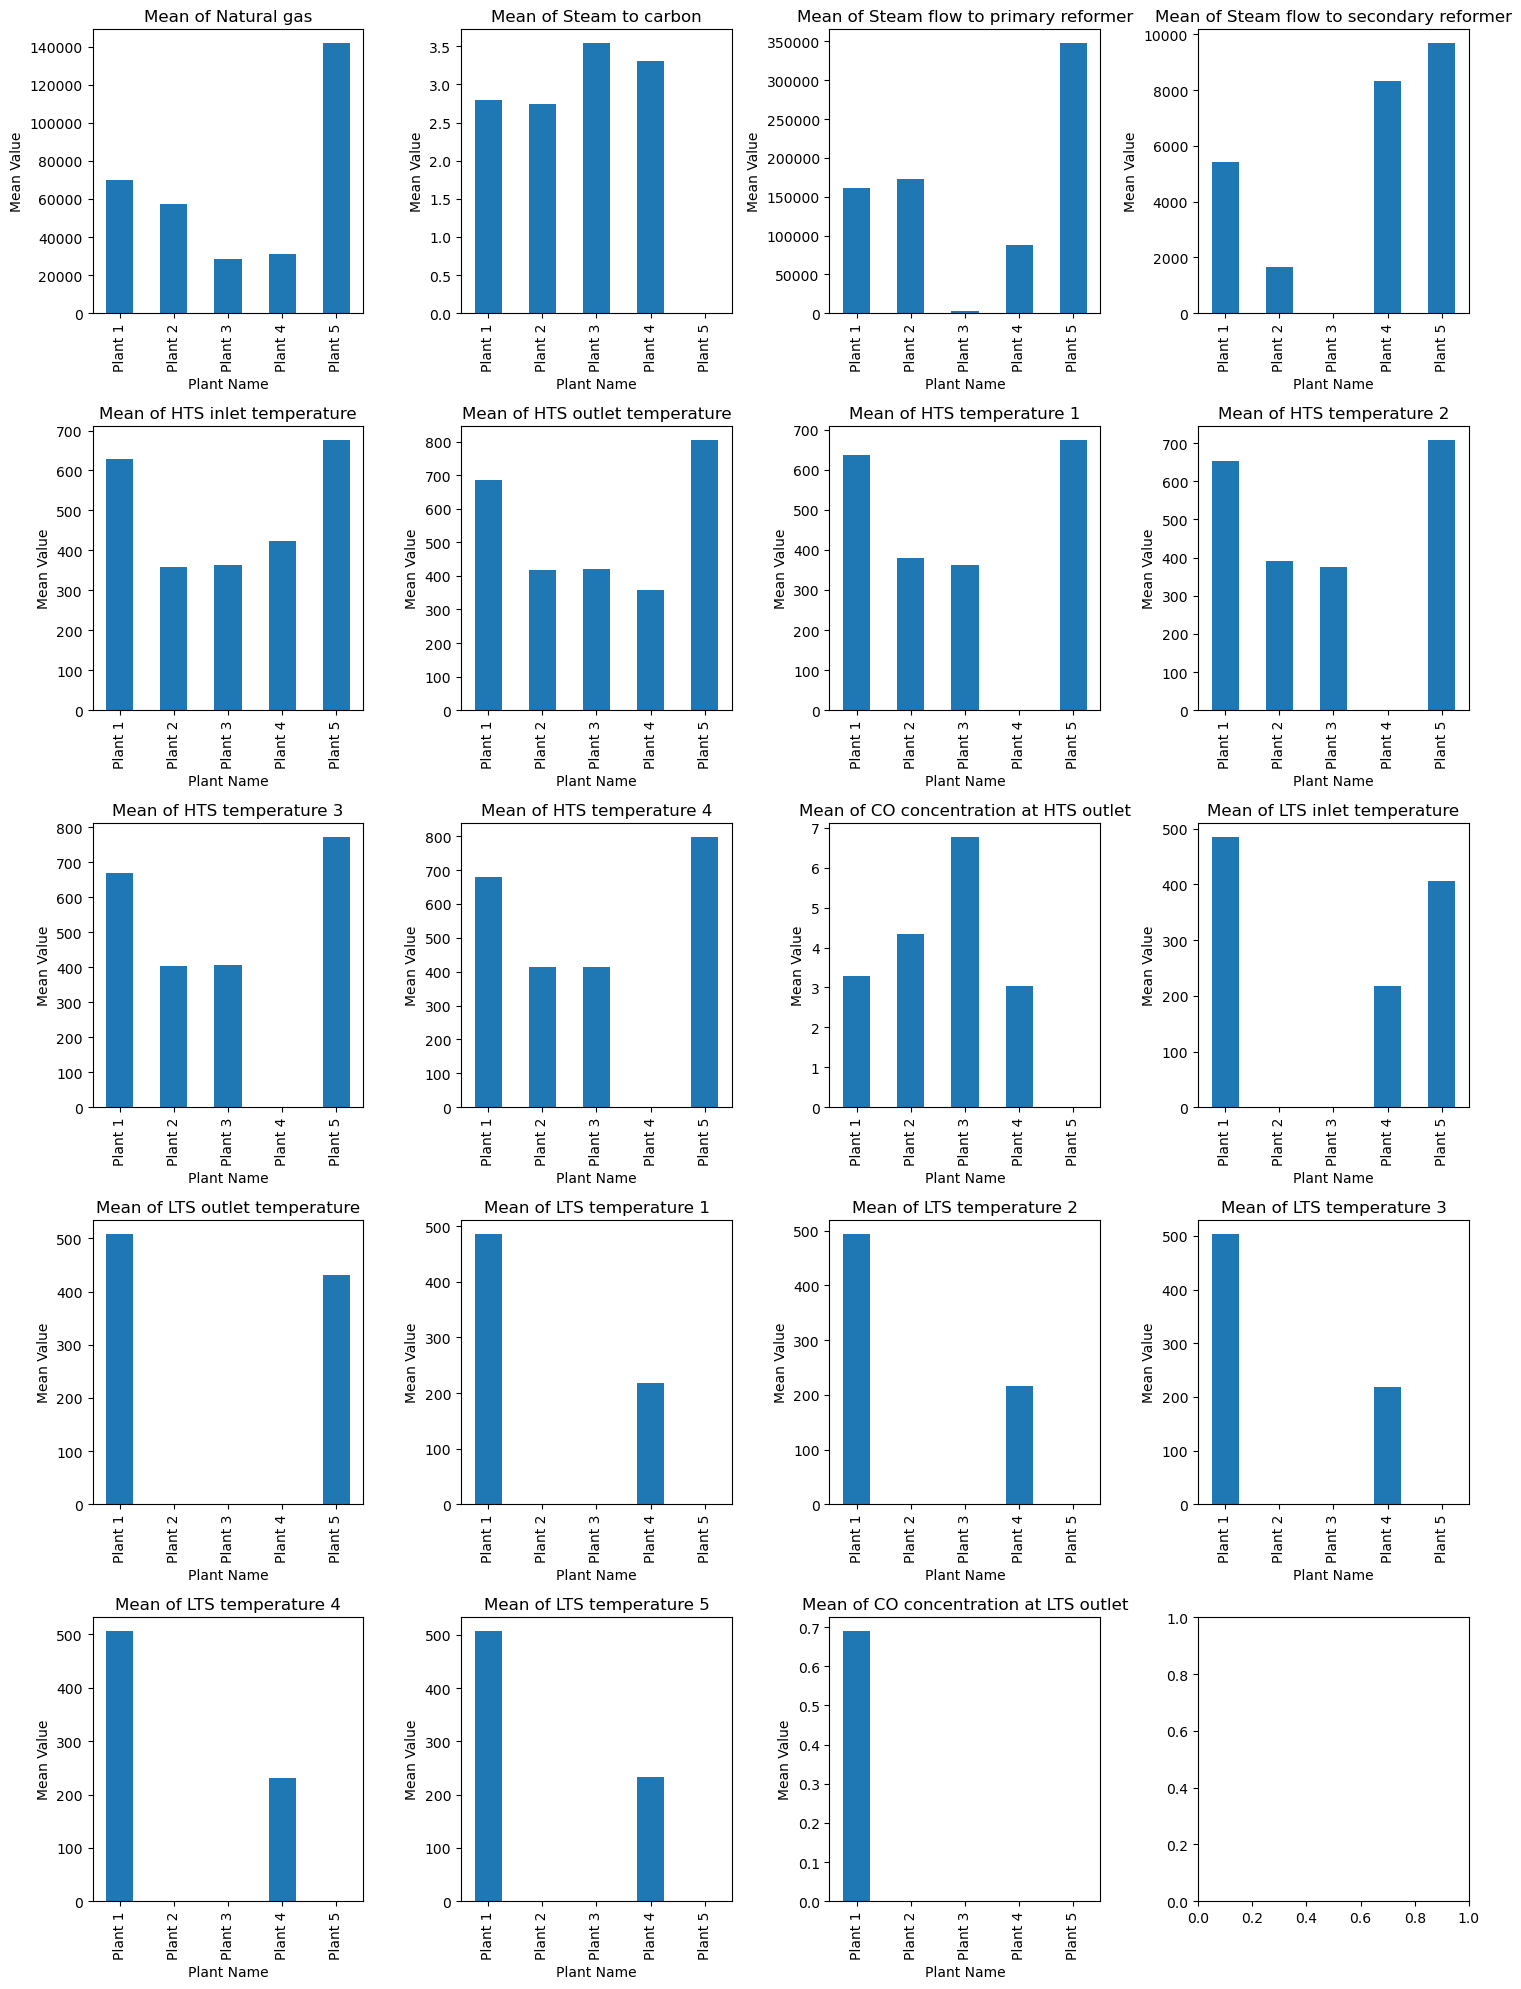

In [37]:
# Calculate mean values for each plant across parameters
mean_df = df_all.groupby('Plant Name').mean()

# Set up the subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create bar plots for each parameter
for i, parameter in enumerate(mean_df.columns):
    ax = axes[i]  # Select the current subplot
    mean_df.plot(kind='bar', y=parameter, ax=ax, legend=False)
    ax.set_title("Mean of " + parameter)
    ax.set_xlabel('Plant Name')
    ax.set_ylabel('Mean Value')

plt.tight_layout()
plt.show()

C:\Users\bilge\AppData\Local\Temp\ipykernel_9688\3824937809.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df_all.groupby('Plant Name').std()


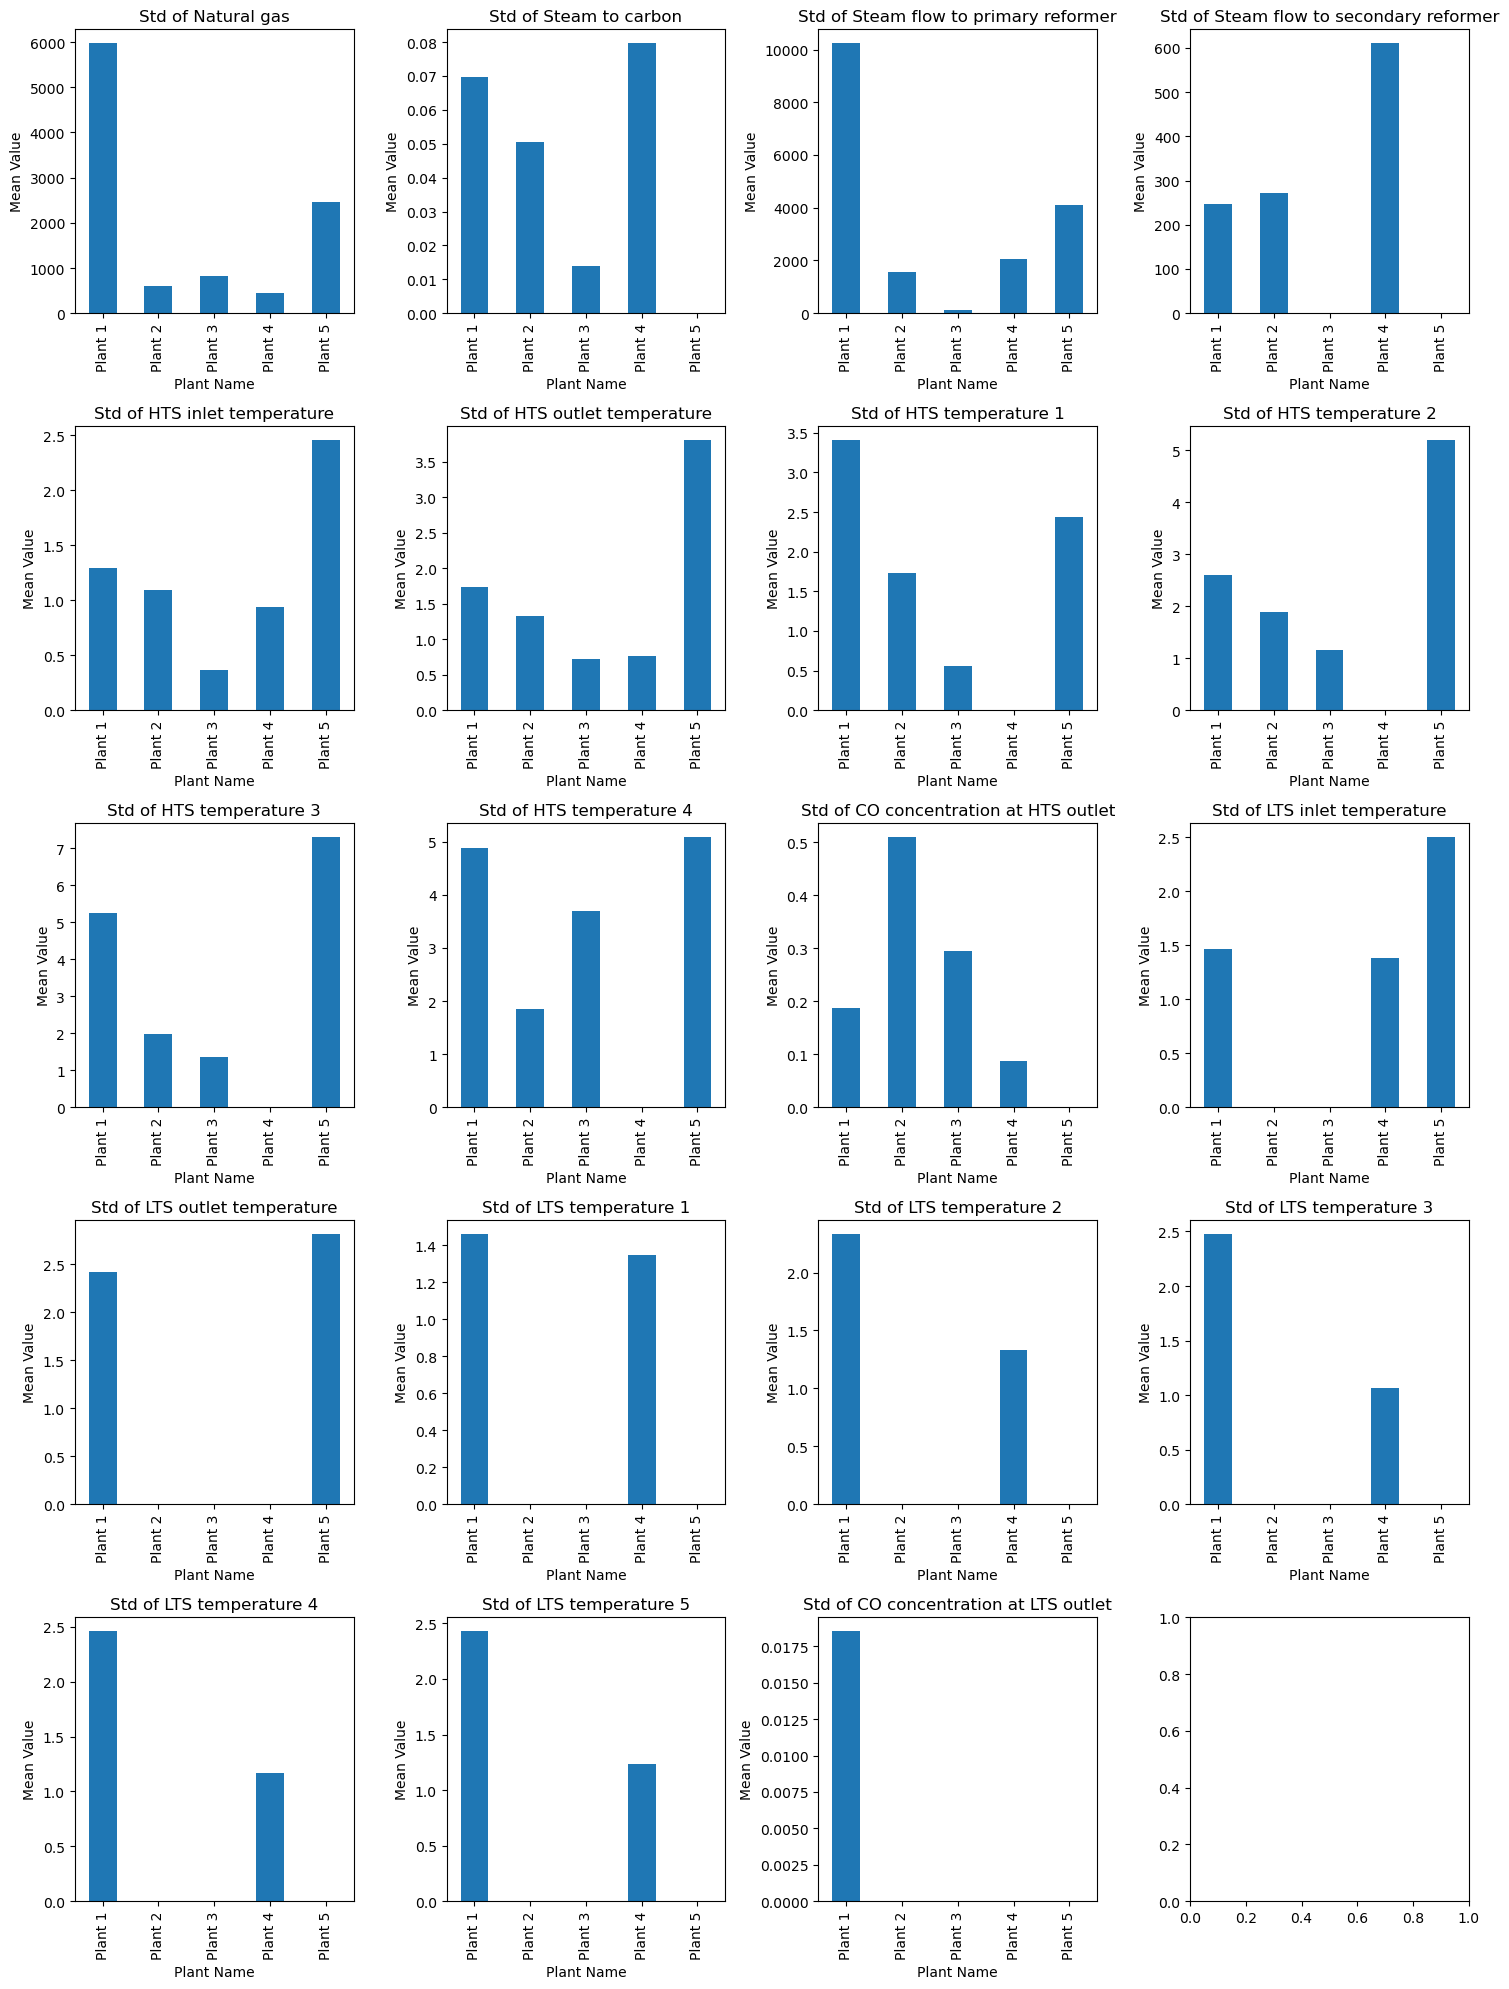

In [36]:
# Calculate mean values for each plant across parameters
mean_df = df_all.groupby('Plant Name').std()

# Set up the subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create bar plots for each parameter
for i, parameter in enumerate(mean_df.columns):
    ax = axes[i]  # Select the current subplot
    mean_df.plot(kind='bar', y=parameter, ax=ax, legend=False)
    ax.set_title("Std of "  + parameter)
    ax.set_xlabel('Plant Name')
    ax.set_ylabel('Mean Value')

plt.tight_layout()
plt.show()

# Discussions

In [41]:
print(df_all['Natural gas'].corr(df_all['CO concentration at HTS outlet']))
print(df_all['Steam flow to primary reformer'].corr(df_all['CO concentration at HTS outlet']))

-0.3746292381521835
-0.5762661186547775


There is a negative correlation between "CO concentration at HTS outlet" and "Natural gas" or "Steam flow to primary reformer". Increase in flow rate results in less CO at outlet meaning less loss.

Individual plant data mostly satisfies the abovementioned fact. In plant 1, this correlation does not appear. A potential reason can be the fact that natural gas flow Plant 1 has a considerably large standard deviation. Moreover, "Steam flow to primary reformer" is much less than natural gas flow. A possible remark is that an imperfection between these steps cause a nonideal process and higher CO concentration at the end of the process.

HTS inlet temperature and HTS outlet temperature are similar in Plant 1, 2, 3 and 5. However, in Plant 4, outlet temperature is considerably decreased. This may be an indication of a nonideal process in this step.